In [1]:
from __future__ import division
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import scipy.optimize as op 

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics as metrices

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [2]:
geisinger_afib_panda = pd.read_csv('geisinger_afib_aflt_patients.csv')
geisinger_non_afib_panda = pd.read_csv('geisinger_non_afib_aflt_patients.csv')

In [3]:
#data for 2762 patients's first occurance of afib
data_afib_per_patient_panda = pd.read_csv('df_afib_aflt_no_duplicate_per_patient.csv')

#data for 1091 patients's whose first occurance of afib is before the stroke date
data_afib_diagnosed_before_storke = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] < 0]
data_afib_diagnosed_before_storke_at_index = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] == 0]
data_afib_diagnosed_after_storke_within_3_years =  data_afib_per_patient_panda[(data_afib_per_patient_panda['Occurance_in_years'] > 0) & (data_afib_per_patient_panda['Occurance_in_years'] <= 3)]
data_afib_diagnosed_other = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] > 3]

print(data_afib_diagnosed_before_storke['PT_ID'].nunique())
print(data_afib_diagnosed_before_storke_at_index['PT_ID'].nunique())
print(data_afib_diagnosed_after_storke_within_3_years['PT_ID'].nunique())
print(data_afib_diagnosed_other['PT_ID'].nunique())

1090
841
587
279


In [4]:
Lab_data_event_dates = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='PT_ID and Event Dates')
Lab_data_BMI = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='BMI')
Lab_data_CRP = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='CRP')
Lab_data_ESR = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='ESR')
Lab_data_GFR = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='GFR')
Lab_data_HB = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HB')
Lab_data_HBA1C = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HBA1C')
Lab_data_HCT = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HCT')
Lab_data_HDL = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HDL')
Lab_data_LDL = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='LDL')
Lab_data_PLT = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='PLT')
Lab_data_WBC = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='WBC')

In [5]:
Lab_data_event_dates = Lab_data_event_dates[Lab_data_event_dates['PT_DEATH_DT'].notna()]
Lab_data_BMI = Lab_data_BMI[Lab_data_BMI['TIME_DIFF_BMI_INDEX'].notna()]
Lab_data_CRP = Lab_data_CRP[Lab_data_CRP['TIME_DIFF_CRP_INDEX'].notna()]
Lab_data_ESR = Lab_data_ESR[Lab_data_ESR['TIME_DIFF_ESR_INDEX'].notna()]
Lab_data_GFR = Lab_data_GFR[Lab_data_GFR['TIME_DIFF_GFR_INDEX'].notna()]
Lab_data_HB = Lab_data_HB[Lab_data_HB['TIME_DIFF_HB_INDEX'].notna()]
Lab_data_HBA1C = Lab_data_HBA1C[Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'].notna()]
Lab_data_HCT = Lab_data_HCT[Lab_data_HCT['TIME_DIFF_HCT_INDEX'].notna()]
Lab_data_HDL = Lab_data_HDL[Lab_data_HDL['TIME_DIFF_HDL_INDEX'].notna()]
Lab_data_LDL = Lab_data_LDL[Lab_data_LDL['TIME_DIFF_LDL_INDEX'].notna()]
Lab_data_PLT = Lab_data_PLT[Lab_data_PLT['TIME_DIFF_PLT_INDEX'].notna()]
Lab_data_WBC = Lab_data_WBC[Lab_data_WBC['TIME_DIFF_WBC_INDEX'].notna()]

In [6]:
print(Lab_data_event_dates['PT_ID'].nunique())
print(Lab_data_BMI['PT_ID'].nunique())
print(Lab_data_CRP['PT_ID'].nunique())
print(Lab_data_ESR['PT_ID'].nunique())
print(Lab_data_GFR['PT_ID'].nunique())
print(Lab_data_HB['PT_ID'].nunique())
print(Lab_data_HBA1C['PT_ID'].nunique())
print(Lab_data_HCT['PT_ID'].nunique())
print(Lab_data_HDL['PT_ID'].nunique())
print(Lab_data_LDL['PT_ID'].nunique())
print(Lab_data_PLT['PT_ID'].nunique())
print(Lab_data_WBC['PT_ID'].nunique())

2765
8649
2514
4540
8821
8868
7774
8867
8528
8522
8863
8863


In [7]:
Lab_data_BMI_refined = Lab_data_BMI[(Lab_data_BMI['TIME_DIFF_BMI_INDEX'] <= 0) & (Lab_data_BMI['TIME_DIFF_BMI_INDEX'] > -1095)]
Lab_data_CRP_refined = Lab_data_CRP[(Lab_data_CRP['TIME_DIFF_CRP_INDEX'] <= 0) & (Lab_data_CRP['TIME_DIFF_CRP_INDEX'] > -1095)]
Lab_data_ESR_refined = Lab_data_ESR[(Lab_data_ESR['TIME_DIFF_ESR_INDEX'] <= 0) & (Lab_data_ESR['TIME_DIFF_ESR_INDEX'] > -1095)]
Lab_data_GFR_refined = Lab_data_GFR[(Lab_data_GFR['TIME_DIFF_GFR_INDEX'] <= 0) & (Lab_data_GFR['TIME_DIFF_GFR_INDEX']  > -1095)]
Lab_data_HB_refined = Lab_data_HB[(Lab_data_HB['TIME_DIFF_HB_INDEX'] <= 0) & (Lab_data_HB['TIME_DIFF_HB_INDEX'] < 1095)]
Lab_data_HBA1C_refined = Lab_data_HBA1C[(Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'] >= 0) & (Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'] < 1095)]
Lab_data_HCT_refined = Lab_data_HCT[(Lab_data_HCT['TIME_DIFF_HCT_INDEX'] <= 0) & (Lab_data_HCT['TIME_DIFF_HCT_INDEX'] > -1095)]
Lab_data_HDL_refined = Lab_data_HDL[(Lab_data_HDL['TIME_DIFF_HDL_INDEX'] <= 0) & (Lab_data_HDL['TIME_DIFF_HDL_INDEX'] > -1095)]
Lab_data_LDL_refined = Lab_data_LDL[(Lab_data_LDL['TIME_DIFF_LDL_INDEX'] <= 0) & (Lab_data_LDL['TIME_DIFF_LDL_INDEX'] > -1095)]
Lab_data_PLT_refined = Lab_data_PLT[(Lab_data_PLT['TIME_DIFF_PLT_INDEX'] <= 0) & (Lab_data_PLT['TIME_DIFF_PLT_INDEX'] > -1095)]
Lab_data_WBC_refined = Lab_data_WBC[(Lab_data_WBC['TIME_DIFF_WBC_INDEX'] <= 0) & (Lab_data_WBC['TIME_DIFF_WBC_INDEX'] > -1095)]

In [8]:
print(Lab_data_BMI_refined['PT_ID'].nunique())
print(Lab_data_CRP_refined['PT_ID'].nunique())
print(Lab_data_ESR_refined['PT_ID'].nunique())
print(Lab_data_GFR_refined['PT_ID'].nunique())
print(Lab_data_HB_refined['PT_ID'].nunique())
print(Lab_data_HBA1C_refined['PT_ID'].nunique())
print(Lab_data_HCT_refined['PT_ID'].nunique())
print(Lab_data_HDL_refined['PT_ID'].nunique())
print(Lab_data_LDL_refined['PT_ID'].nunique())
print(Lab_data_PLT_refined['PT_ID'].nunique())
print(Lab_data_WBC_refined['PT_ID'].nunique())

8003
870
1915
8181
8485
7127
8330
5020
5100
8325
8317


# $\color{BLUE}{\text{Patients having afib before stroke index}}$

In [9]:
Lab_data_BMI_before_stroke = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('BMI ',Lab_data_BMI_before_stroke['PT_ID'].nunique())
Lab_data_CRP_before_stroke = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('CRP ',Lab_data_CRP_before_stroke['PT_ID'].nunique())
Lab_data_ESR_before_stroke = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('ESR ',Lab_data_ESR_before_stroke['PT_ID'].nunique())
Lab_data_GFR_before_stroke = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('GFR ',Lab_data_GFR_before_stroke['PT_ID'].nunique())
Lab_data_HB_before_stroke = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HB ',Lab_data_HB_before_stroke['PT_ID'].nunique())
Lab_data_HBA1C_before_stroke = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_before_stroke['PT_ID'].nunique())
Lab_data_HCT_before_stroke = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HCT ',Lab_data_HCT_before_stroke['PT_ID'].nunique())
Lab_data_HDL_before_stroke = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HDL ',Lab_data_HDL_before_stroke['PT_ID'].nunique())
Lab_data_LDL_before_stroke = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('LDL ',Lab_data_LDL_before_stroke['PT_ID'].nunique())
Lab_data_PLT_before_stroke = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('PLT ',Lab_data_PLT_before_stroke['PT_ID'].nunique())
Lab_data_WBC_before_stroke = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('WBC ',Lab_data_WBC_before_stroke['PT_ID'].nunique())

BMI  1070
CRP  158
ESR  332
GFR  1062
HB  1084
HBA1C  869
HCT  1071
HDL  790
LDL  810
PLT  1070
WBC  1071


In [10]:
data_afib_diagnosed_before_storke[~data_afib_diagnosed_before_storke['PT_ID'].isin(Lab_data_BMI_before_stroke['PT_ID'])].count()

ENC_DT                 20
ENC_TYPE               20
ICD_CD                 20
ICD_NM                 20
INDEX_DT               20
PT_ID                  20
Difference             20
Difference_in_years    20
Occurance_in_years     20
dtype: int64

In [11]:
print('========================')
print('BMI \n',Lab_data_BMI_before_stroke.describe())
print('========================')
print('CRP \n',Lab_data_CRP_before_stroke['PT_ID'].describe())
print('========================')
print('ESR \n',Lab_data_ESR_before_stroke['PT_ID'].describe())
print('========================')
print('GFR \n',Lab_data_GFR_before_stroke['PT_ID'].describe())
print('========================')
print('HB \n',Lab_data_HB_before_stroke['PT_ID'].describe())
print('========================')
print('HBA1C \n',Lab_data_HBA1C_before_stroke['PT_ID'].describe())
print('========================')
print('HCT \n',Lab_data_HCT_before_stroke['PT_ID'].describe())
print('========================')
print('HDL \n',Lab_data_HDL_before_stroke['PT_ID'].describe())
print('========================')
print('LDL \n',Lab_data_LDL_before_stroke['PT_ID'].describe())
print('========================')
print('PLT \n',Lab_data_PLT_before_stroke['PT_ID'].describe())
print('========================')
print('WBC \n',Lab_data_WBC_before_stroke['PT_ID'].describe())


BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count   22458.00             22458.00
mean       29.75              -461.30
std         6.77               331.04
min        15.00             -1094.00
25%        25.00              -734.00
50%        29.00              -439.00
75%        33.40              -158.00
max        92.00                 0.00
CRP 
 count          302
unique         158
top       PT777077
freq            21
Name: PT_ID, dtype: object
ESR 
 count           656
unique          332
top       PT1060126
freq             22
Name: PT_ID, dtype: object
GFR 
 count        18922
unique        1062
top       PT234434
freq           253
Name: PT_ID, dtype: object
HB 
 count        36717
unique        1084
top       PT263782
freq           642
Name: PT_ID, dtype: object
HBA1C 
 count         2131
unique         869
top       PT336644
freq            18
Name: PT_ID, dtype: object
HCT 
 count        16424
unique        1071
top       PT741218
freq           197
Name: PT_ID, dtype: 

In [12]:
Lab_data_BMI_before_stroke_sorted = Lab_data_BMI_before_stroke.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('===================================================')
print('BMI \n',Lab_data_BMI_before_stroke_sorted.describe())
#Lab_data_BMI_before_stroke_sorted['BMI_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_CRP_before_stroke_sorted = Lab_data_CRP_before_stroke.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_before_stroke_sorted.describe())
#Lab_data_CRP_before_stroke_sorted['CRP_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_ESR_before_stroke_sorted = Lab_data_ESR_before_stroke.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_before_stroke_sorted.describe())
#Lab_data_ESR_before_stroke_sorted['ESR_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_GFR_before_stroke_sorted = Lab_data_GFR_before_stroke.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_before_stroke_sorted.describe())
#Lab_data_GFR_before_stroke_sorted['GFR_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HB_before_stroke_sorted = Lab_data_HB_before_stroke.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_before_stroke_sorted.describe())
#Lab_data_HB_before_stroke_sorted['HB_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HBA1C_before_stroke_sorted = Lab_data_HBA1C_before_stroke.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_before_stroke_sorted.describe())
#Lab_data_HBA1C_before_stroke_sorted['HBA1C_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HCT_before_stroke_sorted = Lab_data_HCT_before_stroke.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_before_stroke_sorted.describe())
#Lab_data_HCT_before_stroke_sorted['HCT_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HDL_before_stroke_sorted = Lab_data_HDL_before_stroke.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_before_stroke_sorted.describe())
#Lab_data_HDL_before_stroke_sorted['HDL_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_LDL_before_stroke_sorted =Lab_data_LDL_before_stroke.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_before_stroke_sorted.describe())
#Lab_data_LDL_before_stroke_sorted['LDL_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_PLT_before_stroke_sorted = Lab_data_PLT_before_stroke.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_before_stroke_sorted.describe())
#Lab_data_PLT_before_stroke_sorted['PLT_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_WBC_before_stroke_sorted = Lab_data_WBC_before_stroke.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_before_stroke_sorted.describe())
#Lab_data_WBC_before_stroke_sorted['WBC_VALUE'].hist(bins=100)

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1070.00              1070.00
mean       28.56               -22.54
std         6.28               100.28
min        15.10             -1087.00
25%        24.30                 0.00
50%        27.75                 0.00
75%        32.40                 0.00
max        58.90                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     158.00               158.00
mean       43.08              -373.87
std        64.89               333.98
min         0.37             -1094.00
25%         4.00              -575.50
50%        13.77              -301.00
75%        52.75               -80.75
max       318.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     332.00               332.00
mean       35.11              -323.33
std        28.44               329.66
min         1.00             -1094.00
25%        13.00              -538.25
50%        26.00              -207.50
75%        50.00               -

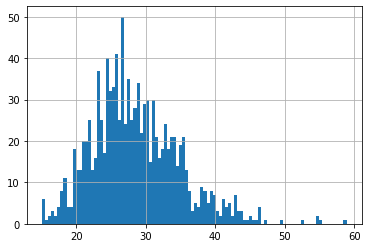

In [13]:
Lab_data_BMI_before_stroke_sorted['BMI_VALUE'].hist(bins=100)

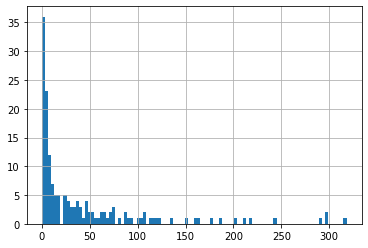

In [14]:
Lab_data_CRP_before_stroke_sorted['CRP_VALUE'].hist(bins=100)

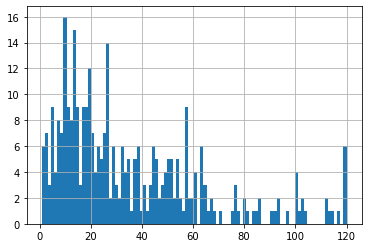

In [15]:
Lab_data_ESR_before_stroke_sorted['ESR_VALUE'].hist(bins=100)

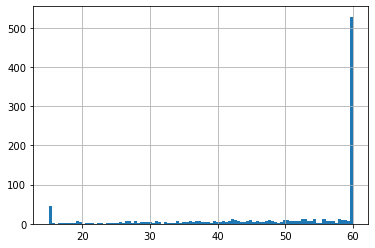

In [16]:
Lab_data_GFR_before_stroke_sorted['GFR_VALUE'].hist(bins=100)

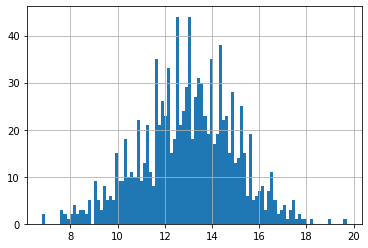

In [17]:
Lab_data_HB_before_stroke_sorted['HB_VALUE'].hist(bins=100)

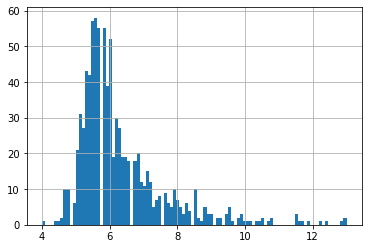

In [18]:
Lab_data_HBA1C_before_stroke_sorted['HBA1C_VALUE'].hist(bins=100)

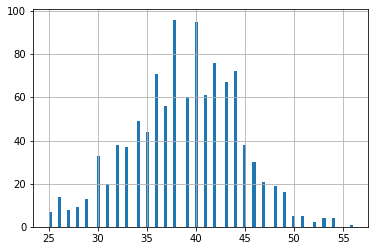

In [19]:
Lab_data_HCT_before_stroke_sorted['HCT_VALUE'].hist(bins=100)

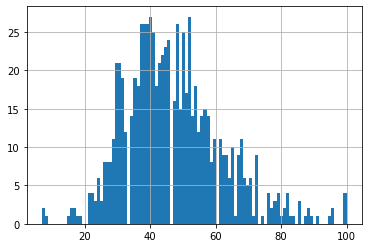

In [20]:
Lab_data_HDL_before_stroke_sorted['HDL_VALUE'].hist(bins=100)

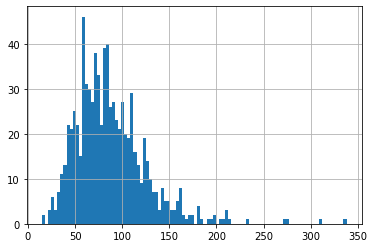

In [21]:
Lab_data_LDL_before_stroke_sorted['LDL_VALUE'].hist(bins=100)

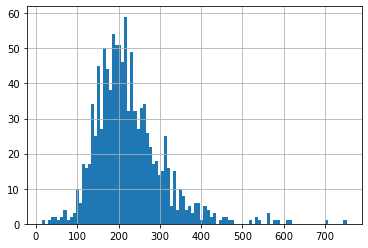

In [22]:
Lab_data_PLT_before_stroke_sorted['PLT_VALUE'].hist(bins=100)

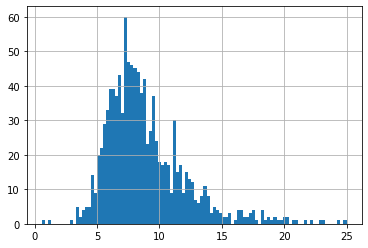

In [23]:
Lab_data_WBC_before_stroke_sorted['WBC_VALUE'].hist(bins=100)

# $\color{BLUE}{\text{Patients having afib at stroke index}}$

In [24]:
Lab_data_BMI_before_stroke_at_index = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('BMI ',Lab_data_BMI_before_stroke_at_index['PT_ID'].nunique())
Lab_data_CRP_before_stroke_at_index = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('CRP ',Lab_data_CRP_before_stroke_at_index['PT_ID'].nunique())
Lab_data_ESR_before_stroke_at_index = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('ESR ',Lab_data_ESR_before_stroke_at_index['PT_ID'].nunique())
Lab_data_GFR_before_stroke_at_index = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('GFR ',Lab_data_GFR_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HB_before_stroke_at_index = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HB ',Lab_data_HB_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HBA1C_before_stroke_at_index = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HCT_before_stroke_at_index = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HCT ',Lab_data_HCT_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HDL_before_stroke_at_index = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HDL ',Lab_data_HDL_before_stroke_at_index['PT_ID'].nunique())
Lab_data_LDL_before_stroke_at_index = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('LDL ',Lab_data_LDL_before_stroke_at_index['PT_ID'].nunique())
Lab_data_PLT_before_stroke_at_index = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('PLT ',Lab_data_PLT_before_stroke_at_index['PT_ID'].nunique())
Lab_data_WBC_before_stroke_at_index = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('WBC ',Lab_data_WBC_before_stroke_at_index['PT_ID'].nunique())

BMI  758
CRP  42
ESR  96
GFR  756
HB  803
HBA1C  711
HCT  786
HDL  411
LDL  414
PLT  782
WBC  778


In [25]:
Lab_data_BMI_before_stroke_at_index_sorted = Lab_data_BMI_before_stroke_at_index.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_before_stroke_at_index_sorted.describe())
Lab_data_CRP_before_stroke_at_index_sorted = Lab_data_CRP_before_stroke_at_index.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_before_stroke_at_index_sorted.describe())
Lab_data_ESR_before_stroke_at_index_sorted = Lab_data_ESR_before_stroke_at_index.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_before_stroke_at_index_sorted.describe())
Lab_data_GFR_before_stroke_at_index_sorted = Lab_data_GFR_before_stroke_at_index.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_before_stroke_at_index_sorted.describe())
Lab_data_HB_before_stroke_at_index_sorted = Lab_data_HB_before_stroke_at_index.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_before_stroke_at_index_sorted.describe())
Lab_data_HBA1C_before_stroke_at_index_sorted = Lab_data_HBA1C_before_stroke_at_index.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_before_stroke_at_index_sorted.describe())
Lab_data_HCT_before_stroke_at_index_sorted = Lab_data_HCT_before_stroke_at_index.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_before_stroke_at_index_sorted.describe())
Lab_data_HDL_before_stroke_at_index_sorted = Lab_data_HDL_before_stroke_at_index.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_before_stroke_at_index_sorted.describe())
Lab_data_LDL_before_stroke_at_index_sorted =Lab_data_LDL_before_stroke_at_index.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_before_stroke_at_index_sorted.describe())
Lab_data_PLT_before_stroke_at_index_sorted = Lab_data_PLT_before_stroke_at_index.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_before_stroke_at_index_sorted.describe())
Lab_data_WBC_before_stroke_at_index_sorted = Lab_data_WBC_before_stroke_at_index.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_before_stroke_at_index_sorted.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     758.00               758.00
mean       29.19               -18.20
std         6.75                93.57
min        15.90             -1073.00
25%        24.60                 0.00
50%        28.00                 0.00
75%        32.50                 0.00
max        60.80                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      42.00                42.00
mean       39.45              -298.14
std        55.05               347.59
min         0.48             -1084.00
25%         3.25              -500.50
50%         9.50              -125.50
75%        62.75                 0.00
max       273.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count      96.00                96.00
mean       30.80              -242.12
std        24.65               330.17
min         2.00             -1090.00
25%        11.00              -415.75
50%        23.00               -44.00
75%        44.00                

# $\color{BLUE}{\text{Patients having afib within 3 years after stroke index}}$

In [26]:
Lab_data_BMI_after_storke_within_3_years = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('BMI ',Lab_data_BMI_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_CRP_after_storke_within_3_years = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('CRP ',Lab_data_CRP_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_ESR_after_storke_within_3_years = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('ESR ',Lab_data_ESR_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_GFR_after_storke_within_3_years = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('GFR ',Lab_data_GFR_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HB_after_storke_within_3_years = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HB ',Lab_data_HB_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HBA1C_after_storke_within_3_years = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HCT_after_storke_within_3_years = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HCT ',Lab_data_HCT_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HDL_after_storke_within_3_years = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HDL ',Lab_data_HDL_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_LDL_after_storke_within_3_years = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('LDL ',Lab_data_LDL_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_PLT_after_storke_within_3_years = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('PLT ',Lab_data_PLT_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_WBC_after_storke_within_3_years = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('WBC ',Lab_data_WBC_after_storke_within_3_years['PT_ID'].nunique())

BMI  523
CRP  49
ESR  107
GFR  536
HB  552
HBA1C  476
HCT  536
HDL  329
LDL  335
PLT  535
WBC  534


In [27]:
Lab_data_BMI_after_storke_within_3_years = Lab_data_BMI_after_storke_within_3_years.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_after_storke_within_3_years.describe())
Lab_data_CRP_after_storke_within_3_years = Lab_data_CRP_after_storke_within_3_years.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_after_storke_within_3_years.describe())
Lab_data_ESR_after_storke_within_3_years = Lab_data_ESR_after_storke_within_3_years.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_after_storke_within_3_years.describe())
Lab_data_GFR_after_storke_within_3_years = Lab_data_GFR_after_storke_within_3_years.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_after_storke_within_3_years.describe())
Lab_data_HB_after_storke_within_3_years = Lab_data_HB_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_after_storke_within_3_years.describe())
Lab_data_HBA1C_after_storke_within_3_years = Lab_data_HBA1C_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_after_storke_within_3_years.describe())
Lab_data_HCT_after_storke_within_3_years= Lab_data_HCT_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_after_storke_within_3_years.describe())
Lab_data_HDL_after_storke_within_3_years = Lab_data_HDL_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_after_storke_within_3_years.describe())
Lab_data_LDL_after_storke_within_3_years =Lab_data_LDL_after_storke_within_3_years.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_after_storke_within_3_years.describe())
Lab_data_PLT_after_storke_within_3_years = Lab_data_PLT_after_storke_within_3_years.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_after_storke_within_3_years.describe())
Lab_data_WBC_after_storke_within_3_years = Lab_data_WBC_after_storke_within_3_years.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_after_storke_within_3_years.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     523.00               523.00
mean       29.77               -29.99
std         6.61               124.39
min        16.10             -1091.00
25%        25.45                 0.00
50%        28.70                 0.00
75%        33.35                 0.00
max        62.00                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      49.00                49.00
mean       40.20              -297.08
std        67.71               308.75
min         0.42              -969.00
25%         2.00              -481.00
50%         5.00              -204.00
75%        42.00               -14.00
max       286.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     107.00               107.00
mean       30.87              -250.37
std        26.28               322.24
min         0.00             -1044.00
25%        11.00              -405.50
50%        21.00               -54.00
75%        41.00                

# $\color{BLUE}{\text{Patients having afib 3 years after stroke index}}$

In [28]:
Lab_data_BMI_other = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('BMI ',Lab_data_BMI_other['PT_ID'].nunique())
Lab_data_CRP_other = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('CRP ',Lab_data_CRP_other['PT_ID'].nunique())
Lab_data_ESR_other = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('ESR ',Lab_data_ESR_other['PT_ID'].nunique())
Lab_data_GFR_other = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('GFR ',Lab_data_GFR_other['PT_ID'].nunique())
Lab_data_HB_other = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HB ',Lab_data_HB_other['PT_ID'].nunique())
Lab_data_HBA1C_other = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_other['PT_ID'].nunique())
Lab_data_HCT_other = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HCT ',Lab_data_HCT_other['PT_ID'].nunique())
Lab_data_HDL_other = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HDL ',Lab_data_HDL_other['PT_ID'].nunique())
Lab_data_LDL_other = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('LDL ',Lab_data_LDL_other['PT_ID'].nunique())
Lab_data_PLT_other = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('PLT ',Lab_data_PLT_other['PT_ID'].nunique())
Lab_data_WBC_other = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('WBC ',Lab_data_WBC_other['PT_ID'].nunique())

BMI  233
CRP  18
ESR  68
GFR  250
HB  260
HBA1C  182
HCT  250
HDL  158
LDL  157
PLT  250
WBC  250


In [29]:
Lab_data_BMI_other= Lab_data_BMI_other.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_other.describe())
Lab_data_CRP_other = Lab_data_CRP_other.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_other.describe())
Lab_data_ESR_other = Lab_data_ESR_other.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_other.describe())
Lab_data_GFR_other = Lab_data_GFR_other.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_other.describe())
Lab_data_HB_other = Lab_data_HB_other.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_other.describe())
Lab_data_HBA1C_other = Lab_data_HBA1C_other.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_other.describe())
Lab_data_HCT_other = Lab_data_HCT_other.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_other.describe())
Lab_data_HDL_other = Lab_data_HDL_other.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_other.describe())
Lab_data_LDL_other =Lab_data_LDL_other.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_other.describe())
Lab_data_PLT_other = Lab_data_PLT_other.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_other.describe())
Lab_data_WBC_other= Lab_data_WBC_other.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_other.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     233.00               233.00
mean       30.61               -50.87
std         7.36               149.61
min        16.50             -1073.00
25%        25.80               -26.00
50%        29.50                 0.00
75%        33.70                 0.00
max        65.50                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      18.00                18.00
mean       49.10              -350.50
std        88.72               378.38
min         0.82             -1084.00
25%         1.72              -649.50
50%        12.00              -253.00
75%        36.95                -2.25
max       297.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count      68.00                68.00
mean       27.09              -306.49
std        20.45               363.58
min         1.00             -1084.00
25%        10.00              -494.25
50%        24.50              -146.50
75%        38.50                

# $\color{RED}{\text{Patients having no Afib at all}}$

In [30]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  5418
CRP  603
ESR  1312
GFR  5576
HB  5785
HBA1C  4888
HCT  5686
HDL  3331
LDL  3383
PLT  5687
WBC  5683


In [31]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    5418.00              5418.00
mean       29.25               -24.20
std         6.71               108.81
min        15.00             -1084.00
25%        24.70                 0.00
50%        28.30                 0.00
75%        32.80                 0.00
max        85.40                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     603.00               603.00
mean       26.17              -261.08
std        53.61               325.23
min         0.00             -1091.00
25%         2.00              -493.00
50%         5.00               -96.00
75%        20.00                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count    1312.00              1312.00
mean       28.50              -238.15
std        26.09               319.25
min         0.00             -1088.00
25%        10.00              -442.25
50%        20.00               -43.50
75%        38.00                

In [32]:
Lab_data_BMI_refined.nunique()

PT_ID                  8003
BMI_DT                 6436
BMI_VALUE               505
TIME_DIFF_BMI_INDEX    1095
dtype: int64

# having at least one follow up within 3 years and no afib

In [33]:
data_full_non_afib_patients = pd.read_csv('data_full_non_afib_aflt_patients.csv')

In [34]:
print(data_full_non_afib_patients['PT_ID'].nunique())
data_full_non_afib_patients['INDEX_DT'] = pd.to_datetime(data_full_non_afib_patients['INDEX_DT'])
data_full_non_afib_patients['ENC_DT'] = pd.to_datetime(data_full_non_afib_patients['ENC_DT'])
data_full_non_afib_patients['Difference'] = (data_full_non_afib_patients['ENC_DT'] - data_full_non_afib_patients['INDEX_DT'])
data_full_non_afib_patients['Difference_in_years'] = (data_full_non_afib_patients['ENC_DT'] - data_full_non_afib_patients['INDEX_DT'])/np.timedelta64(1,'Y')
data_full_non_afib_encounter_after_stroke = data_full_non_afib_patients[data_full_non_afib_patients['Difference_in_years'] > 0]
print(data_full_non_afib_encounter_after_stroke['PT_ID'].nunique())

6132
5739


In [35]:
data_full_non_afib_patients_no_afib_3_years_follow_up = data_full_non_afib_encounter_after_stroke[data_full_non_afib_encounter_after_stroke['Difference_in_years'] > 3]
print(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'].nunique())

2176


In [36]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  1905
CRP  241
ESR  558
GFR  1970
HB  2035
HBA1C  1648
HCT  1993
HDL  1259
LDL  1278
PLT  1993
WBC  1994


In [37]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1905.00              1905.00
mean       29.97               -32.65
std         6.62               121.79
min        15.50             -1084.00
25%        25.50                 0.00
50%        29.00                 0.00
75%        33.40                 0.00
max        70.20                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     241.00               241.00
mean       22.87              -254.69
std        51.70               317.75
min         0.19             -1091.00
25%         2.00              -444.00
50%         4.00               -96.00
75%        13.00                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     558.00               558.00
mean       25.24              -221.46
std        24.66               304.43
min         0.00             -1085.00
25%        10.00              -405.50
50%        17.00               -34.00
75%        31.00                

# having at least one follow up within 5 years and no afib

In [38]:
data_full_non_afib_patients_no_afib_5_years_follow_up = data_full_non_afib_encounter_after_stroke[data_full_non_afib_encounter_after_stroke['Difference_in_years'] > 5]
print(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'].nunique())

1302


In [39]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  1085
CRP  144
ESR  353
GFR  1149
HB  1198
HBA1C  914
HCT  1164
HDL  744
LDL  753
PLT  1163
WBC  1164


In [40]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1085.00              1085.00
mean       30.18               -39.23
std         6.51               130.40
min        15.40             -1084.00
25%        25.60                -3.00
50%        29.30                 0.00
75%        33.70                 0.00
max        70.20                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     144.00               144.00
mean       21.41              -259.76
std        49.02               332.89
min         0.19             -1091.00
25%         2.00              -450.50
50%         4.00               -79.00
75%        14.40                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     353.00               353.00
mean       23.44              -194.86
std        23.25               286.87
min         1.00             -1085.00
25%         9.00              -346.00
50%        16.00                -9.00
75%        29.00                

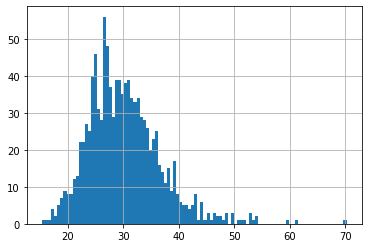

In [41]:
Lab_data_BMI_non_afib['BMI_VALUE'].hist(bins=100)

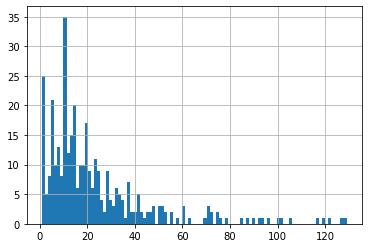

In [42]:
Lab_data_ESR_non_afib['ESR_VALUE'].hist(bins=100)

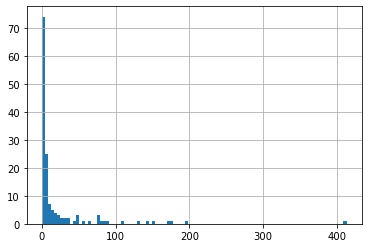

In [43]:
Lab_data_CRP_non_afib['CRP_VALUE'].hist(bins=100)

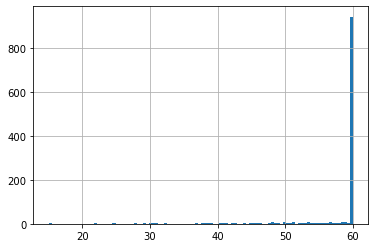

In [44]:
Lab_data_GFR_non_afib['GFR_VALUE'].hist(bins=100)

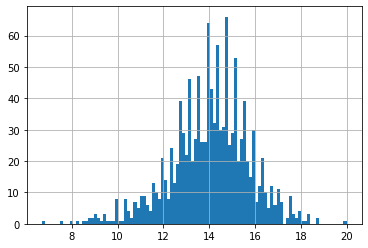

In [45]:
Lab_data_HB_non_afib['HB_VALUE'].hist(bins=100)

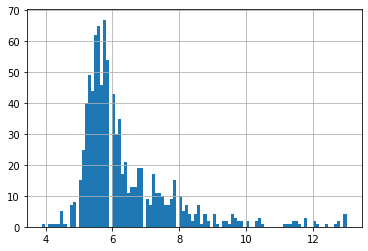

In [46]:
Lab_data_HBA1C_non_afib['HBA1C_VALUE'].hist(bins=100)

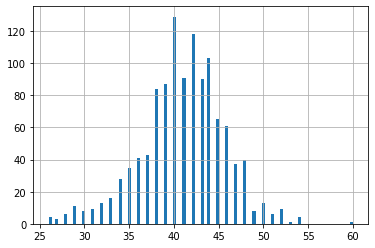

In [47]:
Lab_data_HCT_non_afib['HCT_VALUE'].hist(bins=100)

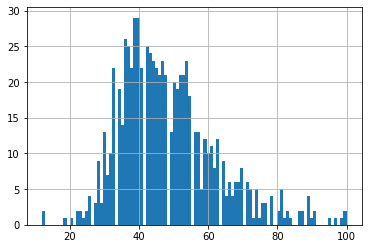

In [48]:
Lab_data_HDL_non_afib['HDL_VALUE'].hist(bins=100)

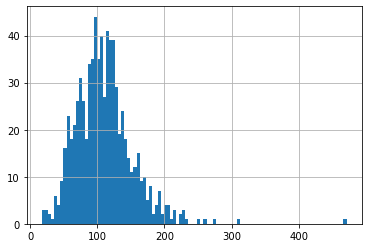

In [49]:
Lab_data_LDL_non_afib['LDL_VALUE'].hist(bins=100)

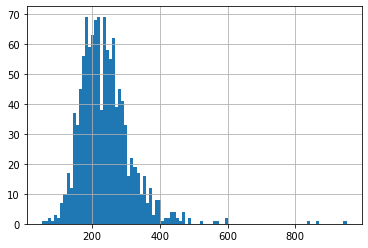

In [50]:
Lab_data_PLT_non_afib['PLT_VALUE'].hist(bins=100)

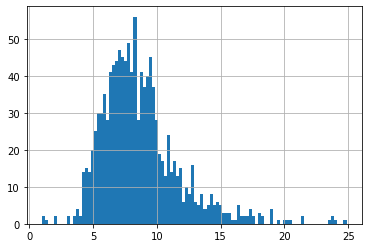

In [51]:
Lab_data_WBC_non_afib['WBC_VALUE'].hist(bins=100)

In [52]:
test = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])].copy()
print(test.count())
testp= test.groupby('PT_ID',as_index=False)['TIME_DIFF_BMI_INDEX'].apply(lambda x: x.sort_values())
test['TIME_DIFF_BMI_INDEX'] = testp.reset_index(level=0, drop=True)
test['diff'] = test.groupby('PT_ID')['TIME_DIFF_BMI_INDEX'].diff()
test['diff'] = test['diff'].fillna(0)
test['cumsum'] = test.groupby('PT_ID')['diff'].cumsum()
#test['diff'] = test['diff'].fillna(0)
print(test.count())

PT_ID                  11026
BMI_DT                 11026
BMI_VALUE              11026
TIME_DIFF_BMI_INDEX    11026
dtype: int64
PT_ID                  11026
BMI_DT                 11026
BMI_VALUE              11026
TIME_DIFF_BMI_INDEX    11026
diff                   11026
cumsum                 11026
dtype: int64


In [53]:
test

,PT_ID,BMI_DT,BMI_VALUE,TIME_DIFF_BMI_INDEX,diff,cumsum
499,PT1039739,2009-10-31,28.20,-1082.00,0.00,0.00
500,PT1039739,2010-01-29,28.20,-992.00,90.00,90.00
501,PT1039739,2010-06-13,28.20,-857.00,135.00,225.00
502,PT1039739,2011-03-24,29.30,-573.00,284.00,509.00
503,PT1039739,2011-04-21,28.60,-545.00,28.00,537.00
...,...,...,...,...,...,...
409481,PT99593,2011-05-27,28.90,-364.00,1.00,1.00
409482,PT99593,2011-06-23,27.10,-337.00,27.00,28.00
409483,PT99593,2012-05-25,27.40,0.00,337.00,365.00
410272,PT99827,2007-03-01,41.70,-739.00,0.00,0.00
